##### 0 - Instalando as biblotecas
- opencv-contrib-python: Pacote do opencv, com módulo principal e contribuições;

In [1]:
# !pip install opencv-contrib-python
# !pip install matplotlib
# !pip install numpy

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1 - Introdução

##### 1.1 - Lendo imagens
- cv.imread(): Recebe um caminho pra arquivo e o tranforma em uma matriz de pixels;
- cv.imshow(): Recebe uma matriz de pixels e cria uma janela com a imagem;
- cv.waitKey(): Espera por uma tecla para fechar a janela por um tempo definido. Zero = tempo indefinido;
- cv.destroyWindow(): Fecha a janela com o nome especificado.

In [2]:
img = cv.imread("Photos/cat.jpg")
cv.imshow("Cat", img)
cv.waitKey(0)
cv.destroyWindow("Cat")

##### 1.2 - Lendo videos
- cv.VideoCapture(): Recebe uma string com o caminho de um vídeo ou um int que referencia uma câmera do computador;
- capture.read(): Lê o objeto criado pelo cv.VideoCapture() e retorna se existe um frame e a matriz de pixels desse frame;
- capture.release(): Liberar o ponteiro de captura;
- cv.destroyAllWindows(): Fecha todas as janelas do opencv abertas;
- Perceba que se você tentar ler depois da última frame, vai acontecer um erro, pois o comando não vai achar o caminho especificado.

In [3]:
capture = cv.VideoCapture("Videos/dog.mp4")
isTrue, frame = capture.read()
while isTrue:
    if cv.waitKey(9) and 0xFF==ord("d"):
        break
    cv.imshow("Dog video", frame)
    isTrue, frame = capture.read()
    
cv.destroyAllWindows()
capture.release()

##### 1.3 - Redimensionando e reescalando
- cv.resize(): Recebe a matriz de pixels, a tupla de dimensões e o parâmetro de interpolação;
- Para evitar e deformações e por praticidade é melhor criar uma função que calcula as proporções dos lados e retorna o método resize;
- Em capturas de vídeo ao vivo, você pode mudar o quadro de captura, através do método set().

In [4]:
def rescaleFrame(frame, scale=0.75):
    # Foto, vídeo ou captura ao vivo
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

def changeRes(width, height):
    # Só para captura ao vivo
    capture.set(3, width)
    capture.set(4, height)
    

In [5]:
capture = cv.VideoCapture("Videos/dog.mp4")
isTrue, frame = capture.read()
while isTrue:
    if cv.waitKey(20) and 0xFF==ord("d"):
        break
    frame_resized = rescaleFrame(frame, 0.2)
    cv.imshow("Dog video", frame_resized)
    isTrue, frame = capture.read()
    
cv.destroyAllWindows()
capture.release()

In [6]:
cv.destroyAllWindows()

#### 2 - Manipulação e Processamento Básico de Imagens

##### 2.1 - Desenhando formas e textos
- Uma matriz de três dimensões de zeros do numpy (np.zeros()) irá criar uma imagem toda preta, você pode alterar as cores de pixels específicos;
- cv.rectangle(): Recebe a matriz, duas tuplas representando o ponto inicial e o ponto final do retângulo, uma tupla representando a cor, e a espessura (cv.FILLED ou -1 = preenchimento);
- cv.circle(): Recebe uma tupla representando o centro, um número representando o raio;
- cv.line(): Recebe duas tuplas representando o ponto inicial e o ponto final da linha;
- cv.putText(): Recebe a string, ponto de começo do texto, a fonte e o tamanho da fonte.

In [7]:
# Transformando cor RGB
blank = np.zeros((500,500,3), dtype="uint8")
# blank[200:300, 300:500] = 0,255,0
cv.imshow("Green", blank)

cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
# Desenhando retangulos (para preencher pode ser -1 ou cv.FILLED)
blank = np.zeros((500,500,3), dtype="uint8")
cv.rectangle(blank, (0,0), (blank.shape[1], blank.shape[0]//2), (0,255,0), thickness=cv.FILLED)
cv.imshow("Green rect", blank)


cv.waitKey(0)
cv.destroyAllWindows()

In [9]:
# Desenhando círculos
blank = np.zeros((500,500,3), dtype="uint8")
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,255,0), thickness=3)
cv.imshow("Green circle", blank)

cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Desenhando linha
blank = np.zeros((500,500,3), dtype="uint8")
cv.line(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,255,0), thickness=3)
cv.imshow("Green line", blank)

cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
# Escrevendo texto
blank = np.zeros((500,500,3), dtype="uint8")
cv.putText(blank, "Hello", (0,500), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,250,0), thickness=2)
cv.imshow("Green text", blank)

cv.waitKey(0)
cv.destroyAllWindows()

##### 2.2 - Conversão para Escala de Cinza e Blur (Desfoque)
- cv.cvtColor(): Recebe a matriz da imagem e um código de transformação, no caso das imagens utilizadas, que estão em BGR, deve se usar cv.COLOR_BGR2GRAY;
- O blur é utilizado para diminuir ruidos na imagens que podem vir a se comportar como outliers, atrapalhando no entendimento da imagem. Existem vários tipos de blur, mas o mais utilizado é o gaussiano;
- cv.GaussianBlur(): Recebe a matriz da imagem e uma tupla de tamanho de kernel, que deve ser um quadrado de lados ímpares.


In [12]:
# Convertendo para escala de cinza
img = cv.imread("Photos/cat.jpg")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("Cat", gray)

cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
# Blur, maior o ksize mais borrado
blur = cv.GaussianBlur(img, (3,3), cv.BORDER_DEFAULT)
cv.imshow("Blur", blur)

cv.waitKey(0)
cv.destroyAllWindows()

##### 2.3 - Transformações Geométricas
- cv.resize(): Irá distorcer a imagem dependendo das dimensões escolhidas. A interpolação não precisa ser especificada, o padrão é o cv.INTER_AREA, que é útil para diminuir imagens, porém, para aumentar imagens o cv.INTER_LINEAR ou cv.INTER_CUBIC;
- Cortando: Pode-se cortar uma imagem selecionando apenas algumas células específicas da matriz da imagem;
- Translação e Rotação:
    - cv.warpAffine(): Realiza transformações geométricas na figura. Recebe uma matriz com o as direções em quais a imagens será translacionada e/ou rotacionada. Devido a complexidade da função é mais prático implantar uma função para usá-la;
    - cv.getRotationMatrix2D(rotPoint, angle, 1.0): Usada para rotacionar a imagem, recebe um ponto de origem, um número de ângulo e um valor para redimensionar a imagem;
- cv.flip(): Recebe a matriz de imagem e um valor para especificar o espelhamento da imagem (0,1,-1).

In [14]:
# Redimensionando
resized = cv.resize(img, (500,500))
cv.imshow("Resized", resized)
cv.imshow("Gato", img)

cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
# Cortando
cropped = img[50:200, 200:400]
cv.imshow("Cropped", cropped)
cv.imshow("Gato", img)

cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
# Translação
def translate(img, x, y):
    # -x:esq; -y:cima; x:dir; y:baixo
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    print(transMat)
    return cv.warpAffine(img, transMat, dimensions)

translated = translate(img, -100, -100)
cv.imshow("translated", translated)
cv.imshow("Gato", img)

cv.waitKey(0)
cv.destroyAllWindows()

[[   1.    0. -100.]
 [   0.    1. -100.]]


In [17]:
# Rotação
def rotate(img, angle, rotPoint=None):
    (height, width) = img.shape[:2]
    if(rotPoint is None):
        rotPoint = (width//2, height//2)
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)
    print(rotMat)
    
    return cv.warpAffine(img, rotMat, dimensions)
    

rotated = rotate(img, 45)
cv.imshow("rotated", rotated)
cv.imshow("Gato", img)

cv.waitKey(0)
cv.destroyAllWindows()

[[  0.70710678   0.70710678 -56.88791437]
 [ -0.70710678   0.70710678 288.66042559]]


In [18]:
# Espelhamento
flipped = cv.flip(img, -1) # 0: vertical; 1: horizontal; -1: os dois.
cv.imshow("flipped", flipped)
cv.imshow("Gato", img)

cv.waitKey(0)
cv.destroyAllWindows()

#### 3 - Detecção de Bordas e Contorno

##### 3.1 - Canny Edge Detector
- Existem vários tipos de detecção de bordas, mas o Canny é o mais conhecido em visão computacional;
- cv.Canny(): Recebe a matriz da imagem e dois valores de limiares (threshold). Observa-se que quando aplicado o blur, detecta-se menos contornos;
- cv.dilate(): Aumenta as áreas de objetos em primeiro plano (brancos) e encolhe os buracos. O número de iterações controla a intensidade da dilatação, assim como o tamanho do kernel;
- cv.erode(): Encolhe as áreas de objetos em primeiro plano e aumenta os buracos. Pode ser usado para reverter parcialmente a dilatação.

In [19]:
# Edge Cascade, imagem com blur vai mostrar menos bordas
canny = cv.Canny(img, 125, 175)
canny_blur = cv.Canny(blur, 125, 175)
cv.imshow("Canny", canny)
cv.imshow("Canny Blur", canny_blur)

cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
# Dilatando contornos
dilated = cv.dilate(canny_blur, (7,7), iterations=3)
cv.imshow("Dilatado", dilated)

cv.waitKey(0)
cv.destroyAllWindows()

In [21]:
# Erosão
eroded = cv.erode(dilated, (7,7), iterations=3)
cv.imshow("Erodido", eroded)

cv.waitKey(0)
cv.destroyAllWindows()

##### 3.2 - Contornos e limiarização
- Contornos são basicamente as linhas e curvas que juntos os pontos contínuos ao longo das fronteiras dos objetos. Sob o ponto de vista matemático, eles não são o mesmo que bordas;
- cv.findCountours():
    - Recebe a matriz, o modo de recuperação e o método de aproximação;
    - Retorna os contornos e hierarquias (Ex.: quais formas são mais proeminentes). 
    - Modos de Recuperação (mode): cv.RETR_LIST (todos os contornos), cv.RETR_EXTERNAL (apenas os externos), cv.RETR_TREE (todos os contornos em uma hierarquia);
    - Métodos de Aproximação (method): cv.CHAIN_APPROX_NONE (retorna todos os pontos do contorno), cv.CHAIN_APPROX_SIMPLE (comprime os pontos do contorno, mantendo apenas os essenciais para definir a forma, ex: dois pontos para uma linha reta);
    - Para diminuir o número de contornos, você pode usar um blur ou usar o threshold.
- cv.threshold(): Usa limiares de valor para transformar, por exemplo, valores de 0 a 255 em valores de 0 e 1 (binarização):
    - Recebe a matriz, um limiar médio, um limiar médio e o tipo de threshold, no caso cv.THRESH_BINARY é para realizar a binarização;
- cv.drawContours(): Recebe uma matriz de zeros (tela preta), a lista de contornos, a quantidade de contornos (-1: todos), a cor e a espessura.


In [22]:
# Contornos
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)

# blur = cv.GaussianBlur(gray, (3,3), cv.BORDER_DEFAULT)
cv.imshow("thresh", thresh)

cv.waitKey(0)
cv.destroyAllWindows()

contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f"{len(contours)} contour(s) found")

402 contour(s) found


In [23]:
# Mostrar contornos
blank = np.zeros(img.shape, dtype="uint8") # Cria uma matriz vazio do tamanho da imagem
cv.drawContours(blank, contours, -1, (0,255,0), 1)
cv.imshow("contornos desenhados", blank)
cv.waitKey(0)
cv.destroyAllWindows()

##### 3.3 - Cores, mascaramento, bitwise e histogramas
- Espaços de Cores, Divisão e Fusão de Canais: OpenCV lê imagens no formato BGR, diferente do RGB comum. Exibir uma imagem BGR em uma biblioteca como Matplotlib (que usa RGB) resultará em inversão de cores. Usa-se cv.cvtColor(imagem, cv.COLOR_BGR2RGB) para converter;

In [24]:
# Espaços de cor
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # grayscale
hsv  = cv.cvtColor(img, cv.COLOR_BGR2HSV) # hsv
lab  = cv.cvtColor(img, cv.COLOR_BGR2LAB) # Lab
rgb  = cv.cvtColor(img, cv.COLOR_BGR2RGB) # RGB

cv.imshow("gray", gray)
cv.imshow("hsv", hsv)
cv.imshow("lab", lab)
cv.imshow("rgb", rgb)
cv.waitKey(0)
cv.destroyAllWindows()

In [25]:
# Canais de cor
b, g, r = cv.split(img)

blank = np.zeros(img.shape[:2], dtype="uint8")
# bg = cv.merge([b,g,blank])
# gr = cv.merge([blank,g,r])
# br = cv.merge([b,blank,r])

b = cv.merge([b,blank,blank])
g = cv.merge([blank,g,blank])
r = cv.merge([blank,blank,r])

cv.imshow("b",b)
cv.imshow("g",g)
cv.imshow("r",r)

# cv.imshow("bg", bg)
# cv.imshow("gr", gr)
# cv.imshow("br", br)

# merged = cv.merge([b,g,r])
# cv.imshow("merged", merged)

cv.waitKey(0)
cv.destroyAllWindows()

In [38]:
cv.destroyAllWindows()

- Operadores Bitwise: Operam em nível binário (pixel "ligado" como 1 ou "desligado" como 0). Incluem AND, OR, XOR e NOT;

In [27]:
blank = np.zeros((400,400), dtype="uint8")
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

cv.imshow("rectangle",rectangle)
cv.imshow("circle",circle)

cv.waitKey(0)
cv.destroyAllWindows()

In [28]:
# Bitwise AND
bitwise_and = cv.bitwise_and(rectangle, circle)
bitwise_or = cv.bitwise_or(rectangle, circle)
bitwise_xor = cv.bitwise_xor(rectangle, circle)
bitwise_not = cv.bitwise_not(rectangle, circle)

# cv.imshow("bitwise_and",bitwise_and)
# cv.imshow("bitwise_or",bitwise_or)
# cv.imshow("bitwise_xor",bitwise_xor)
# cv.imshow("bitwise_not",bitwise_not)

cv.waitKey(0)
cv.destroyAllWindows()

- Mascaramento: Permite focar em partes específicas de uma imagem, removendo regiões indesejadas. A máscara (que pode ser uma forma desenhada em uma imagem em branco) deve ter as mesmas dimensões da imagem original. É aplicado usando cv.bitwise_and() com o parâmetro mask;

In [42]:
# Mascaramento
img = cv.imread("Photos/cats.jpg")
cv.imshow("gatos", img)

blank = np.zeros(img.shape[:2], dtype="uint8")

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow("mascara", mask)

masked = cv.bitwise_and(img, img, mask=mask)
cv.imshow("img com mascara", masked)

cv.waitKey(0)
cv.destroyAllWindows()

- Histogramas: Permitem visualizar a distribuição de intensidade de pixels em uma imagem (seja em escala de cinza ou colorida). Aceita uma lista de imagens, uma lista do índice que representa o canal de cores que você quer utilizar, pode ser colocada uma máscara, o número de bins (intervalos de classe), e o alcance de valores de todos os pixels.

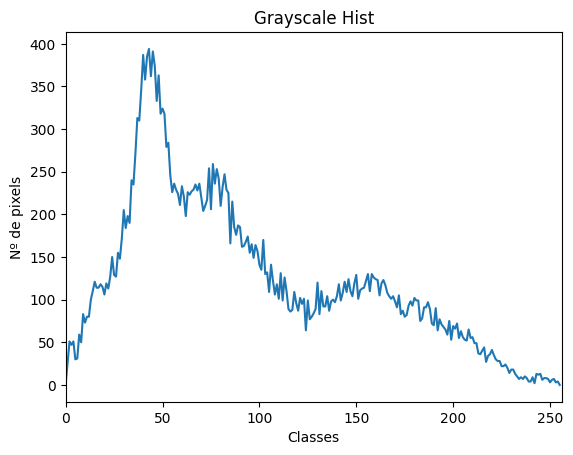

In [ ]:
# Histogramas
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)
cv.imshow("cinza", gray)

gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])
# gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256])

plt.figure()
plt.title("Grayscale Hist")
plt.xlabel("Classes")
plt.ylabel("Nº de pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

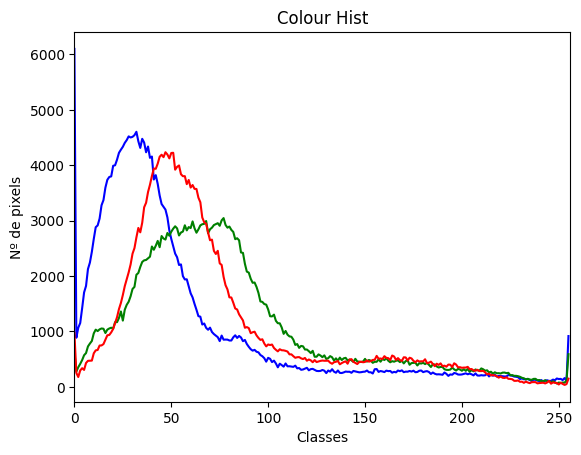

In [51]:
# Histograma colorido
plt.figure()
plt.title("Colour Hist")
plt.xlabel("Classes")
plt.ylabel("Nº de pixels")
colors = ("b", "g", "r")
for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.show()

cv.imshow("gatos", img)
cv.waitKey(0)
cv.destroyAllWindows()

##### 3.4 - Tipos de blur
- Averaging (blur por média): Tira a média da intensidade de cor dos pixels periféricos do kernel;
- Gaussian Blur: Faz a mesma coisa que o averaging, mas com médias ponderadas. Gera menos desfoque, mas acaba sendo mais natural;
- Median (blur por mediana): Tira a mediana da intensidade de cor dos pixels periféricos do kernel. Útil para remover ruídos de imagens;
- Blur bilateral: Útil para manter as bordas da imagem. Usa valores para considerar cores diferentes e distâncias diferentes do pixel em foque.

In [36]:
# Averaging
average = cv.blur(img, (7,7))
cv.imshow("average",average)

# Gaussian
gaussian = cv.GaussianBlur(img, (7,7), 0)
cv.imshow("gaussian",gaussian)

# Median blur - usado pra cv
median = cv.medianBlur(img, 3)
cv.imshow("median",median)

# Bilateral blur
bilateral = cv.bilateralFilter(img, 10, 35, 25)
cv.imshow("bilateral",bilateral)

cv.waitKey(0)
cv.destroyAllWindows()

#### Tópicos Avançados

##### Detecção Facial (Haar Cascades): 
O OpenCV oferece classificadores pré-treinados (como Haar Cascades) para detectar a presença de faces em uma imagem, sem identificar quem é a pessoa. Os classificadores Haar Cascade são sensíveis a ruídos, mas fáceis de usar.
O OpenCV oferece diversos classificadores Haar Cascades: https://github.com/opencv/opencv/tree/4.x/data/haarcascades .

In [ ]:
img = cv.imread("Photos/lady.jpg")
cv.imshow("Person", img)

# img = cv.imread("Photos/group 2.jpg")
# img = cv.imread("Photos/group 1.jpg")

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# haar_cascade = cv.CascadeClassifier("haar_face.xml")

# faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3)

# print(f"Nº de faces: {len(faces_rect)}")

# for (x,y,w,h) in faces_rect:
#     cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)
    
# cv.imshow("Face detectada", img)

cv.waitKey(0)
cv.destroyAllWindows()

Nº de faces: 19


##### Reconhecimento Facial: 
Envolve identificar quem é a pessoa em uma imagem. O OpenCV possui um reconhecedor facial embutido (cv.face.LBPHFaceRecognizer_create()) que pode ser treinado em um conjunto de imagens e rótulos;

In [11]:
import os

pessoas = []
for i in os.listdir("Faces/train"):
    pessoas.append(i)
    
DIR = "Faces/train"
haar_cascade = cv.CascadeClassifier("haar_face.xml")

features=[]
labels=[]
def create_train():
    for pessoa in pessoas:
        path = os.path.join(DIR, pessoa)
        label = pessoas.index(pessoa)
        
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            
            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

In [12]:
create_train()
print(f"Quantidade de feições: {len(features)}")
print(f"Quantidade de rótulos: {len(labels)}")

Quantidade de feições: 100
Quantidade de rótulos: 100


In [ ]:
features = np.array(features, dtype="object")
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

face_recognizer.train(features, labels)

face_recognizer.save("face_traines.yml")

np.save("features.npy", features)
np.save("labels.npy", labels)


In [ ]:
# features = np.load("features.npy")
# labels = np.load("labels.npy")

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read("face_traines.yml")

In [25]:
img = cv.imread("Faces/val/madonna/4.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow("pessoa", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [26]:
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h, x:x+w]
    
    label, confidence = face_recognizer.predict(faces_roi)
    print(f"Rótulo: {str(pessoas[label])} | Confiança: {confidence}")
    
    cv.putText(img, str(pessoas[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)
    
cv.imshow("pessoa", img)
cv.waitKey(0)
cv.destroyAllWindows()

Rótulo: Madonna | Confiança: 96.81807061458018


##### Modelos de Deep Computer Vision: 
Para tarefas mais complexas como classificação de personagens (ex: Os Simpsons), modelos de aprendizado profundo (Deep Learning) são mais eficazes. Bibliotecas como TensorFlow/Keras são usadas para construir e treinar esses modelos, com o OpenCV sendo utilizado para pré-processamento de dados como redimensionamento.

https://www.kaggle.com/datasets/alexattia/the-simpsons-characters-dataset

In [ ]:
cv.destroyAllWindows()